# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.shape

(307511, 122)

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dtypes_train = app_train.dtypes.reset_index()
dtypes_train.columns = ['Columns', "Type"]
num_column = dtypes_train[(dtypes_train["Type"] == 'int64') | (dtypes_train["Type"] == 'float64')].Columns.tolist()
len(num_column)

106

In [7]:
isnull_train = app_train.isnull().sum().reset_index()
isnull_train.columns = ["Columns", "number"]
nonull_column = isnull_train[isnull_train.number == 0].Columns.tolist()
len(nonull_column)

55

In [8]:
num_nonull = list(set(num_column).intersection(set(nonull_column)))
noflag = []
for col in num_nonull: 
    if 'FLAG' not in col: 
        noflag.append(col)
print(f'{len(noflag)} columns that are numerical, have no missing values, and do not contain "FLAG" in their names are: {noflag}')

19 columns that are numerical, have no missing values, and do not contain "FLAG" in their names are: ['REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION', 'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN', 'REG_CITY_NOT_WORK_CITY', 'HOUR_APPR_PROCESS_START', 'SK_ID_CURR', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'AMT_INCOME_TOTAL', 'REG_REGION_NOT_WORK_REGION', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH']


In [9]:
app_train[noflag].head()

,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,DAYS_ID_PUBLISH,REG_REGION_NOT_LIVE_REGION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,REG_CITY_NOT_WORK_CITY,HOUR_APPR_PROCESS_START,SK_ID_CURR,AMT_CREDIT,REGION_RATING_CLIENT,TARGET,REG_CITY_NOT_LIVE_CITY,AMT_INCOME_TOTAL,REG_REGION_NOT_WORK_REGION,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH
0,2,0,0,-2120,0,0.018801,0,0,10,100002,406597.5,2,1,0,202500.0,0,-3648.0,-637,-9461
1,1,0,0,-291,0,0.003541,0,0,11,100003,1293502.5,1,0,0,270000.0,0,-1186.0,-1188,-16765
2,2,0,0,-2531,0,0.010032,0,0,9,100004,135000.0,2,0,0,67500.0,0,-4260.0,-225,-19046
3,2,0,0,-2437,0,0.008019,0,0,17,100006,312682.5,2,0,0,135000.0,0,-9833.0,-3039,-19005
4,2,1,0,-3458,0,0.028663,0,1,11,100007,513000.0,2,0,0,121500.0,0,-4311.0,-3038,-19932


In [10]:
app_train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x11c424dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x11c4426d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c424c88>],
 'medians': [<matplotlib.lines.Line2D at 0x11c442f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c44e390>],
 'means': []}

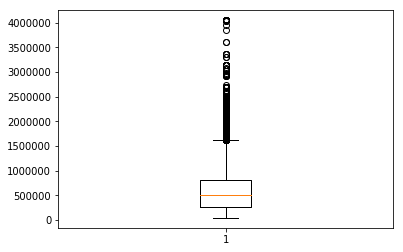

In [11]:
plt.boxplot(app_train['AMT_CREDIT'])

/Users/hahaha/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 7000000)

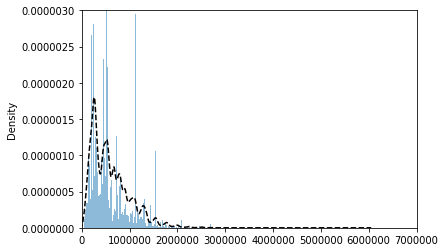

In [12]:
fig, ax = plt.subplots()
app_train['AMT_CREDIT'].hist(bins = 1000, alpha = 0.5, normed = True)
app_train['AMT_CREDIT'].plot(kind = 'kde', style = 'k--')
ax.set_ylim(0, 0.000003)
ax.set_xlim(0, 7000000)